In [138]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [139]:
df=pd.read_csv("data/StudentsPerformance.csv")
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [141]:
df.nunique() #gives number of unique values for each column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [142]:
numeric=[feature for feature in df.columns if df[feature].dtype!="O"]
catergorical=[feature for feature in df.columns if df[feature].dtype=="O"]

In [143]:
print(numeric)
print(catergorical)

['math score', 'reading score', 'writing score']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [144]:
for i in catergorical:
    print(f"{i} : {df[i].unique()}")

gender : ['female' 'male']
race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch : ['standard' 'free/reduced']
test preparation course : ['none' 'completed']


In [145]:
df["total_score"]=df["math score"]+df["writing score"]+df["reading score"]
df["avg_score"]=df["total_score"]/3
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


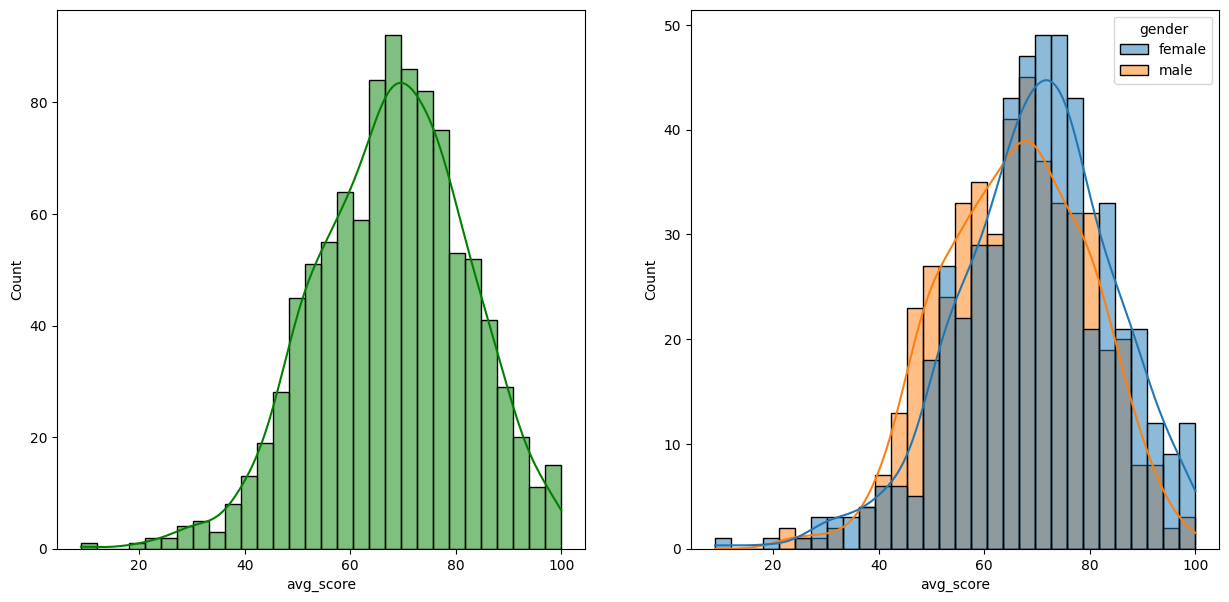

In [146]:
fig,axis=plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="avg_score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="avg_score",bins=30,kde=True,hue="gender")
plt.show()

In [158]:
x=df.drop(columns=["writing score"],axis=1)
y=df["writing score"]

In [159]:
num_feature=x.select_dtypes(exclude="object").columns
catergoric_features=x.select_dtypes(include="object").columns

In [161]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
sc=StandardScaler()
ohe=OneHotEncoder()

preprocessor=ColumnTransformer(
    [    
    ("OneHotEncoder",ohe,catergoric_features),
    ("StandardScaler",sc,num_feature),
    ]
)


In [162]:
x=preprocessor.fit_transform(x)

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [164]:
def eval(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mse)
    r2=r2_score(true,predicted)
    return mse,mae,rmse,r2

In [165]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "SVR":SVR(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "XGBRegressor":XGBRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor()
}

In [166]:
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    model_train_mse,model_train_mae,model_train_rmse,model_train_r2=eval(y_train,y_train_pred)
    model_test_mse,model_test_mae,model_test_rmse,model_test_r2=eval(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training ")
    print(f"Mse:{model_train_mse}")
    print(f"Mae:{model_train_mae}")
    print(f"RMse:{model_train_rmse}")
    print(f"R2:{model_train_r2}")
    print("-"*30)
    print("Model performance for testing")
    print(f"Mse:{model_test_mse}")
    print(f"Mae:{model_test_mae}")
    print(f"RMse:{model_test_rmse}")
    print(f"R2:{model_test_r2}")
    r2_list.append(model_test_r2)

    print("="*30)
    print("\n")


LinearRegression
Model performance for training 
Mse:6.861575262484778e-27
Mae:6.652456363553938e-14
RMse:8.283462598747445e-14
R2:1.0
------------------------------
Model performance for testing
Mse:7.375155266219867e-27
Mae:6.842526545369765e-14
RMse:8.587872417671252e-14
R2:1.0


Lasso
Model performance for training 
Mse:13.45426437964847
Mae:2.9702999755923383
RMse:3.6680055043100017
R2:0.9408039347752071
------------------------------
Model performance for testing
Mse:15.948400637990304
Mae:3.2416094460273928
RMse:3.99354487116275
R2:0.9338287245618683


Ridge
Model performance for training 
Mse:0.22905139876323355
Mae:0.3845324915099539
RMse:0.47859314533665603
R2:0.9989922197781747
------------------------------
Model performance for testing
Mse:0.3006032151748805
Mae:0.4538281779355542
RMse:0.5482729385761078
R2:0.9987527716038471


DecisionTreeRegressor
Model performance for training 
Mse:0.0
Mae:0.0
RMse:0.0
R2:1.0
------------------------------
Model performance for testing


In [167]:
results=pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model","R2_score"]).sort_values(by=['R2_score'],ascending=False)
results

,Model,R2_score
0,LinearRegression,1.000000
2,Ridge,0.998753
8,XGBRegressor,0.976070
4,RandomForestRegressor,0.968073
7,CatBoostRegressor,0.967660
5,AdaBoostRegressor,0.942826
3,DecisionTreeRegressor,0.940046
1,Lasso,0.933829
9,KNeighborsRegressor,0.932271
6,SVR,0.824388


In [168]:
linear=LinearRegression(fit_intercept=True)
linear=linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)
score=r2_score(y_test,y_pred)*100

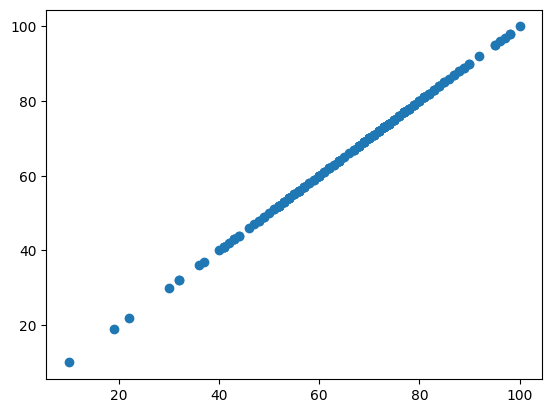

In [169]:
plt.scatter(y_test,y_pred)
plt.show()